# DATA ANALYSIS ON  XYZ SUPERMARKET

## Project Scope
Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen to increase. 

## Features Description
Invoice ID: Customer Identification number

Branch: Supermarket Branch across the country (A, B, C)
A - Lagos Branch
B - Abuja Branch
C - Port Harcourt Branch

City: Supermarket Location

Customer Type: Type of customers, Members - Returning customer with membership card, Normal - Customer without membership (could be returning, first-time or walk-in customer)

Gender: Customer Gender Information

Product line: Product categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit Price: Price of each product in Naira

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Supermarket Record available from January 2019 to March 2019)

Time: Purchase time (Supermarket Hours - 10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Card and Epay)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer Satisfaction rating on their overall shopping experience (On a scale of 1 to 10) 

## Project Requirements

Step 1 - Loading Datasets
-- Correct use of pathname pattern - glob
-- Combine all the files generated in a list and export to a CSV.

Step 2 - Data Exploration
-- Use the head() method to view first few rows of the dataset
-- Check the number of rows and columns present in the data using the shape attribute.
-- Generate the names of the columns using the columns attribute.
-- Use describe function to generate the statistical summary of the dataframe
-- Use meaningful sentences to describe findings from the data statistical summary
-- Use of correct method to check for Missing values
-- Check the information of the DataFrame using the info method.

Step 3 - Dealing with DateTime Features
-- Use to_datetime() to convert the date column to datetime
-- Check the datatype to confirm if it's in datetime
-- Accurate conversion of the time column & prints appropriate data type
-- Accurate extraction of the Day, Month, Year & Hour features
-- The numbers of unique hours of sales in the supermarket are accurately determined.
-- Result that shows an array that contains the unique sales hours.

Step 4 - Unique Values in Columns
-- Appropriate method to generate the unique values in the categorical columns (apart from the example - Branch column).
-- Generated the count figure of the categorical values using the value_counts() method.

Step 5 - Aggregation with GroupBy
-- A groupby object with the "City Column", and aggregation function of sum and mean.
-- A table that shows the gross income of each city, and determines the city with the highest total gross income.
-- Optional - Use of appropriate methods & descriptions to explore other columns such as Unit Price, Quantity.

Step 6 - Data Visualization
-- Appropriate use of countplot to determine the branch with the highest sales record.
-- Optional - Appropriate use of countplot to determine the most used payment method & city with the most sales.
-- Appropriate use of countplot to determine the highest & lowest sold product line.
-- Result that shows the Payment channel used by most customers to pay for each product line. Chart should also show the "product line" column on the Y-axis, and the "hue" parameter for the "Payment" column. 

## Importing Libraries

In [60]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
os.chdir(r'/storage/emulated/0/Ustacky Project 1/')

## Step 1 - Loading Dataset

### --> Correct use of pathname pattern - glob
### --> Combine all the files generated in a list and export to a CSV.

In [61]:
extension = 'csv'
path = r'/storage/emulated/0/Ustacky Project 1/'
files = glob.glob(path + '/*.csv')
print(files)

['/storage/emulated/0/Ustacky Project 1/Port_Harcourt_Branch.csv', '/storage/emulated/0/Ustacky Project 1/Lagos_Branch.csv', '/storage/emulated/0/Ustacky Project 1/Abuja_Branch.csv']


In [62]:
my_list =[]
for f in files:
    # get filename
    stock = os.path.basename(f)
    # read in csv
    temp_df = pd.read_csv(f)
    # create new column with filename
    temp_df['Invoice ID'] = stock
    # data cleaning to remove the .csv
    temp_df['Invoice ID'] = temp_df['Invoice ID'].replace('.csv', '', regex=True)
    # append df to list
    my_list.append(temp_df)
    print(f'Successfully created dataframe for {stock} with shape {temp_df.shape}')

#Export to csv
new_csv = pd.concat(my_list, axis = 0)
print('\n')
print(new_csv.shape)

new_csv.to_csv('new_csv.csv', index = False)

Successfully created dataframe for Port_Harcourt_Branch.csv with shape (328, 17)
Successfully created dataframe for Lagos_Branch.csv with shape (340, 17)
Successfully created dataframe for Abuja_Branch.csv with shape (332, 17)


(1000, 17)


## Step 2 - Data Exploration
###  --> Use the head() method to view first few rows of the dataset

In [63]:
data = pd.read_csv('new_csv.csv')
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,Port_Harcourt_Branch,C,Port Harcourt,Normal,Female,Electronic accessories,5500.8,5,1375.20,28879.20,3/8/2019,10:29,Cash,27504.0,4.761905,1375.20,9.6
1,Port_Harcourt_Branch,C,Port Harcourt,Normal,Male,Electronic accessories,30740.4,7,10759.14,225941.94,3/25/2019,18:30,Epay,215182.8,4.761905,10759.14,4.1
2,Port_Harcourt_Branch,C,Port Harcourt,Normal,Female,Home and lifestyle,26481.6,10,13240.80,278056.80,2/24/2019,11:38,Epay,264816.0,4.761905,13240.80,8.0
3,Port_Harcourt_Branch,C,Port Harcourt,Member,Male,Electronic accessories,30974.4,5,7743.60,162615.60,2/25/2019,11:24,Epay,154872.0,4.761905,7743.60,4.8
4,Port_Harcourt_Branch,C,Port Harcourt,Member,Female,Food and beverages,35791.2,4,7158.24,150323.04,2/6/2019,10:42,Epay,143164.8,4.761905,7158.24,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Abuja_Branch,B,Abuja,Member,Male,Health and beauty,22320.0,8,8928.00,187488.00,1/3/2019,19:08,Card,178560.0,4.761905,8928.00,6.2
996,Abuja_Branch,B,Abuja,Member,Male,Health and beauty,27133.2,8,10853.28,227918.88,1/28/2019,15:46,Card,217065.6,4.761905,10853.28,8.4
997,Abuja_Branch,B,Abuja,Normal,Female,Sports and travel,27576.0,10,13788.00,289548.00,1/24/2019,18:10,Epay,275760.0,4.761905,13788.00,6.0
998,Abuja_Branch,B,Abuja,Normal,Male,Fashion accessories,6296.4,10,3148.20,66112.20,2/22/2019,18:35,Epay,62964.0,4.761905,3148.20,6.6


###  --> Check the number of rows and columns present in the data using the shape attribute.

In [64]:
data.shape

(1000, 17)

lagos=pd.read_csv('/storage/emulated/0/Ustacky Project 1/Lagos_Branch.csv',index_col=False)
abuja=pd.read_csv('/storage/emulated/0/Ustacky Project 1/Abuja_Branch.csv',index_col=False)
port_h=pd.read_csv('/storage/emulated/0/Ustacky Project 1/Port_Harcourt_Branch.csv',index_col=False)

###  --> Generate the names of the columns using the columns attribute.

In [65]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,Port_Harcourt_Branch,C,Port Harcourt,Normal,Female,Electronic accessories,5500.8,5,1375.20,28879.20,3/8/2019,10:29,Cash,27504.0,4.761905,1375.20,9.6
1,Port_Harcourt_Branch,C,Port Harcourt,Normal,Male,Electronic accessories,30740.4,7,10759.14,225941.94,3/25/2019,18:30,Epay,215182.8,4.761905,10759.14,4.1
2,Port_Harcourt_Branch,C,Port Harcourt,Normal,Female,Home and lifestyle,26481.6,10,13240.80,278056.80,2/24/2019,11:38,Epay,264816.0,4.761905,13240.80,8.0
3,Port_Harcourt_Branch,C,Port Harcourt,Member,Male,Electronic accessories,30974.4,5,7743.60,162615.60,2/25/2019,11:24,Epay,154872.0,4.761905,7743.60,4.8
4,Port_Harcourt_Branch,C,Port Harcourt,Member,Female,Food and beverages,35791.2,4,7158.24,150323.04,2/6/2019,10:42,Epay,143164.8,4.761905,7158.24,7.5


In [66]:
data.shape

(1000, 17)

In [67]:
columns=pd.DataFrame(data.columns,columns=['Columns'])
columns

,Columns
0,Invoice ID
1,Branch
2,City
3,Customer type
4,Gender
5,Product line
6,Unit price
7,Quantity
8,Tax 5%
9,Total


## DATA EXPLORATION

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### --> Use describe function to generate the statistical summary of the dataframe

In [69]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,0.000000,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905,17874.000000,10.00000


### --> Use meaningful sentences to describe findings from the data statistical summary

The approximate average unit price and quantity are #20,000 and 6 units respectively making our total sales/revenue to be around #120,000 without incurring tax.

The tax on the supermarket is about 4.5% of the total sales

After accounting for tax the average total value is found to be around #116,000.
#### Formula;
##### Gross Profit= Net sales - Cost of goods sold
##### Gross Profit Percentage= Gross Profit/ net sales x 100
Knowing that the average cost of goods sold is apporximately #110,700 and the gross income is approximately #5537 it informs us that the average sales made within the timeframe is about #115,000 

The average rating is 6.97 indicating that the supermarket is doing slightly better above average implying that more work needs to be done to improve tghe companies services and products availability to customers


### --> Use of correct method to check for Missing values

In [70]:
data.isnull()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
data.notna().count()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

All the data are filled with inputs and hence there are no null or empty data cells in the columns

### --> Check the information of the DataFrame using the info method.

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features
### --> Use to_datetime() to convert the date column to datetime

In [73]:
data['Date']=pd.to_datetime(data['Date'])

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [75]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,Port_Harcourt_Branch,C,Port Harcourt,Normal,Female,Electronic accessories,5500.8,5,1375.20,28879.20,2019-03-08,10:29,Cash,27504.0,4.761905,1375.20,9.6
1,Port_Harcourt_Branch,C,Port Harcourt,Normal,Male,Electronic accessories,30740.4,7,10759.14,225941.94,2019-03-25,18:30,Epay,215182.8,4.761905,10759.14,4.1
2,Port_Harcourt_Branch,C,Port Harcourt,Normal,Female,Home and lifestyle,26481.6,10,13240.80,278056.80,2019-02-24,11:38,Epay,264816.0,4.761905,13240.80,8.0
3,Port_Harcourt_Branch,C,Port Harcourt,Member,Male,Electronic accessories,30974.4,5,7743.60,162615.60,2019-02-25,11:24,Epay,154872.0,4.761905,7743.60,4.8
4,Port_Harcourt_Branch,C,Port Harcourt,Member,Female,Food and beverages,35791.2,4,7158.24,150323.04,2019-02-06,10:42,Epay,143164.8,4.761905,7158.24,7.5


### --> Check the datatype to confirm if it's in datetime

In [76]:
data['Date'].dtype

dtype('<M8[ns]')

### --> Accurate conversion of the time column & prints appropriate data type

In [77]:
data['Time']=pd.to_datetime(data['Time'])

In [78]:
data['Time'].dtype

dtype('<M8[ns]')

In [79]:
data.Time.dtype

dtype('<M8[ns]')

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [81]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,Port_Harcourt_Branch,C,Port Harcourt,Normal,Female,Electronic accessories,5500.8,5,1375.20,28879.20,2019-03-08,2021-05-13 10:29:00,Cash,27504.0,4.761905,1375.20,9.6
1,Port_Harcourt_Branch,C,Port Harcourt,Normal,Male,Electronic accessories,30740.4,7,10759.14,225941.94,2019-03-25,2021-05-13 18:30:00,Epay,215182.8,4.761905,10759.14,4.1
2,Port_Harcourt_Branch,C,Port Harcourt,Normal,Female,Home and lifestyle,26481.6,10,13240.80,278056.80,2019-02-24,2021-05-13 11:38:00,Epay,264816.0,4.761905,13240.80,8.0
3,Port_Harcourt_Branch,C,Port Harcourt,Member,Male,Electronic accessories,30974.4,5,7743.60,162615.60,2019-02-25,2021-05-13 11:24:00,Epay,154872.0,4.761905,7743.60,4.8
4,Port_Harcourt_Branch,C,Port Harcourt,Member,Female,Food and beverages,35791.2,4,7158.24,150323.04,2019-02-06,2021-05-13 10:42:00,Epay,143164.8,4.761905,7158.24,7.5


### --> Accurate extraction of the Day, Month, Year & Hour features

In [82]:
data.Time.dtype

dtype('<M8[ns]')

In [83]:
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['Days']=data['Date'].dt.day
data['Hours']=data['Time'].dt.hour

### --> The numbers of unique hours of sales in the supermarket are accurately determined.

In [84]:
data['Hours'].value_counts()

19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: Hours, dtype: int64

In [85]:
data['Hours'].nunique()

11

### --> Result that shows an array that contains the unique sales hours.

In [86]:
hours=pd.DataFrame(data.Hours.value_counts())
hours

,Hours
19,113
13,103
15,102
10,101
18,93
11,90
12,89
14,83
16,77
20,75


In [87]:
data.Hours.unique()

array([10, 18, 11, 12, 13, 20, 19, 17, 15, 16, 14], dtype=int64)

In [88]:
#data['Time']= data['Time'].dt.time

In [89]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Days,Hours
0,Port_Harcourt_Branch,C,Port Harcourt,Normal,Female,Electronic accessories,5500.8,5,1375.20,28879.20,...,2021-05-13 10:29:00,Cash,27504.0,4.761905,1375.20,9.6,2019,3,8,10
1,Port_Harcourt_Branch,C,Port Harcourt,Normal,Male,Electronic accessories,30740.4,7,10759.14,225941.94,...,2021-05-13 18:30:00,Epay,215182.8,4.761905,10759.14,4.1,2019,3,25,18
2,Port_Harcourt_Branch,C,Port Harcourt,Normal,Female,Home and lifestyle,26481.6,10,13240.80,278056.80,...,2021-05-13 11:38:00,Epay,264816.0,4.761905,13240.80,8.0,2019,2,24,11
3,Port_Harcourt_Branch,C,Port Harcourt,Member,Male,Electronic accessories,30974.4,5,7743.60,162615.60,...,2021-05-13 11:24:00,Epay,154872.0,4.761905,7743.60,4.8,2019,2,25,11
4,Port_Harcourt_Branch,C,Port Harcourt,Member,Female,Food and beverages,35791.2,4,7158.24,150323.04,...,2021-05-13 10:42:00,Epay,143164.8,4.761905,7158.24,7.5,2019,2,6,10


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

## Step 4 - Unique Values in Columns

### --> Appropriate method to generate the unique values in the categorical columns (apart from the example - Branch column).

In [91]:
data.nunique()

Invoice ID                   3
Branch                       3
City                         3
Customer type                2
Gender                       2
Product line                 6
Unit price                 943
Quantity                    10
Tax 5%                     990
Total                      990
Date                        89
Time                       506
Payment                      3
cogs                       990
gross margin percentage      1
gross income               990
Rating                      61
Year                         1
Month                        3
Days                        31
Hours                       11
dtype: int64

### --> Generated the count figure of the categorical values using the value_counts() method.

In [92]:
cat_col=['City','Customer type','Gender','Product line','Payment']
data[cat_col].nunique()

City             3
Customer type    2
Gender           2
Product line     6
Payment          3
dtype: int64

In [93]:
for col in data[cat_col]:
    print(data[col].unique())

['Port Harcourt' 'Lagos' 'Abuja']
['Normal' 'Member']
['Female' 'Male']
['Electronic accessories' 'Home and lifestyle' 'Food and beverages'
 'Sports and travel' 'Health and beauty' 'Fashion accessories']
['Cash' 'Epay' 'Card']


In [94]:
for col in data.columns:
    print(data[col].value_counts())

Lagos_Branch            340
Abuja_Branch            332
Port_Harcourt_Branch    328
Name: Invoice ID, dtype: int64
A    340
B    332
C    328
Name: Branch, dtype: int64
Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64
Member    501
Normal    499
Name: Customer type, dtype: int64
Female    501
Male      499
Name: Gender, dtype: int64
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
30157.2    3
9453.6     2
13089.6    2
18698.4    2
8906.4     2
          ..
16837.2    1
19569.6    1
21153.6    1
18334.8    1
11808.0    1
Name: Unit price, Length: 943, dtype: int64
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64
3717.36    2
8074.08    2
3730.86    2
1495.44    2
3241.62    2
          ..
4582.98    1
2367.9

## Step 5 - Aggregation with GroupBy
### --> A groupby object with the "City Column", and aggregation function of sum and mean.

In [95]:
data.groupby('City').aggregate(['sum','mean'])

Unit price               Quantity                Tax 5%  \
                     sum          mean      sum      mean         sum   
City                                                                    
Abuja          6652396.8  20037.339759     1820  5.481928  1820531.52   
Lagos          6705176.4  19721.107059     1859  5.467647  1820577.78   
Port Harcourt  6684393.6  20379.248780     1831  5.582317  1895463.54   

                                  Total                       cogs  \
                      mean          sum           mean         sum   
City                                                                 
Abuja          5483.528675  38231161.92  115154.102169  36410630.4   
Lagos          5354.640529  38232133.38  112447.451118  36411555.6   
Port Harcourt  5778.852256  39804734.34  121355.897378  37909270.8   

                              ...  Rating              Year       Month  \
                        mean  ...     sum      mean     sum  mean   sum   
City                          ...                                         
Abuja          109670.573494  ...  2263.6  6.818072  670308  2019   665   
Lagos          107092.810588  ...  2389.2  7.027059  686460  2019   688   
Port Harcourt  115577.045122  ...  2319.9  7.072866  662232  2019   640   

                         Days            Hours             
                   mean   sum       mean   sum       mean  
City                                                       
Abuja          2.003012  5068  15.265060  5029  15.147590  
Lagos          2.023529  5232  15.388235  4987  14.667647  
Port Harcourt  1.951220  4956  15.109756  4894  14.920732  

[3 rows x 24 columns]

### --> A table that shows the gross income of each city, and determines the city with the highest total gross income.

In [96]:
data.groupby('City')['gross income'].aggregate(['sum','mean'])

,sum,mean
City,,
Abuja,1820531.52,5483.528675
Lagos,1820577.78,5354.640529
Port Harcourt,1895463.54,5778.852256


We can say inferentially that Port Harcourt has the highest total gross income with Abuja being the second and then Lagos.

### --> Optional - Use of appropriate methods & descriptions to explore other columns such as Unit Price, Quantity.

In [97]:
data.pivot_table('gross income',index='Gender',columns='City',aggfunc='mean',margins=True)

City,Abuja,Lagos,Port Harcourt,All
Gender,,,,
Female,5600.877778,5671.960994,5940.815056,5744.497006
Male,5371.701882,5069.229385,5586.656400,5327.815311
All,5483.528675,5354.640529,5778.852256,5536.572840


In [98]:
data.groupby('City')['Unit price'].aggregate(['sum','mean'])

,sum,mean
City,,
Abuja,6652396.8,20037.339759
Lagos,6705176.4,19721.107059
Port Harcourt,6684393.6,20379.248780


In [99]:
data.groupby('City')['Quantity'].aggregate(['sum','mean'])

,sum,mean
City,,
Abuja,1820,5.481928
Lagos,1859,5.467647
Port Harcourt,1831,5.582317


In [119]:
data.groupby('City')['Rating'].aggregate(['sum','mean'])

,sum,mean
City,,
Abuja,2263.6,6.818072
Lagos,2389.2,7.027059
Port Harcourt,2319.9,7.072866


The city with the highest average rating is and the City with the highest average rating is PortHarcourt with Lagos being the next in line followed by Abuja.

In [120]:
data.groupby('Branch')['Quantity'].aggregate(['sum','mean'])

,sum,mean
Branch,,
A,1859,5.467647
B,1820,5.481928
C,1831,5.582317


The branch with the highest average rating is and the City with the highest average rating is branch C with branch B being the next in line followed by A.

## Step 6 - Data Visualization

### --> Result that shows the Payment channel used by most customers to pay for each product line. Chart should also show the "product line" column on the Y-axis, and the "hue" parameter for the "Payment" column. 

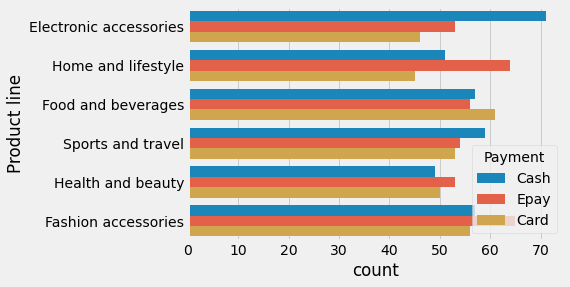

In [100]:
sns.countplot(y='Product line',hue='Payment',data=data)

* A large percent of the electrical accessories were paid for using cash channel

* For home and lifestyle product lines it was majorly purchased using Epay

* There is a fine distribution of the payment channels used for the food and beverages product line

* Sports and travel have majority of their products paid in cash

* Most of the customers purchase for health and beauty products were paid with using Epay

* A very large amount of the Fashion accessories were paid for using Epay

### -->Optional - Appropriate use of countplot to determine the most used payment method & city with the most sales.

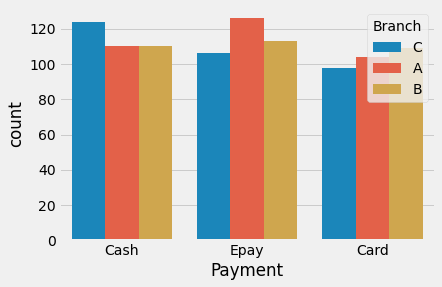

In [101]:
sns.countplot(x='Payment',hue='Branch',data=data)

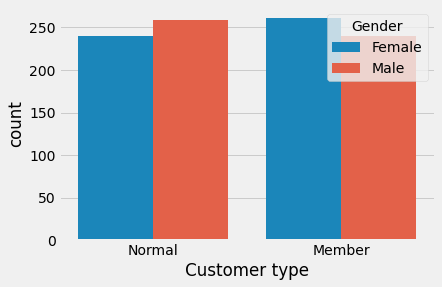

In [102]:
sns.countplot(x='Customer type',hue='Gender',data=data)

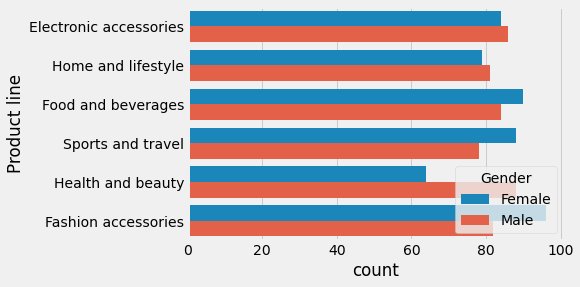

In [103]:
sns.countplot(y='Product line',hue='Gender',data=data)

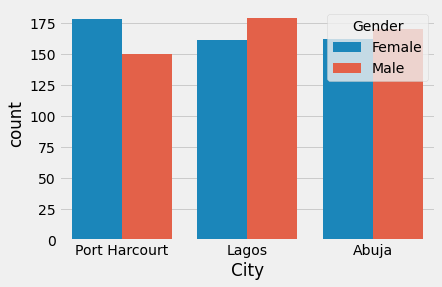

In [104]:
sns.countplot(x='City',hue='Gender',data=data)

Dominant female activity in branch A and B while the men seem to be slightly higher than the females at Branch C

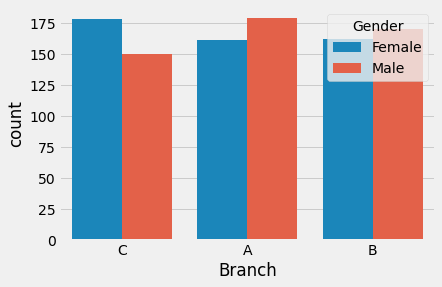

In [105]:
sns.countplot(x='Branch',hue='Gender',data=data)

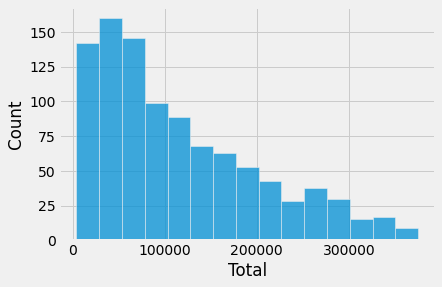

In [106]:
sns.histplot(data['Total'])

## Outliers Detection

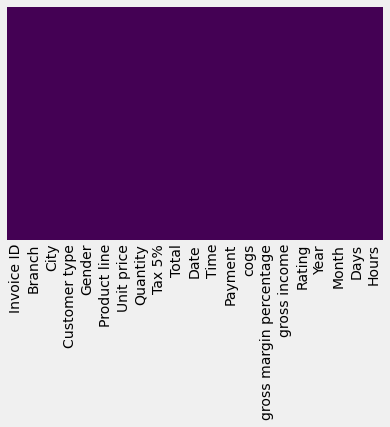

In [107]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

This shows us that there are no missing values in the dataset

## Correlation Analysis Of All Non object columns

### Pearson

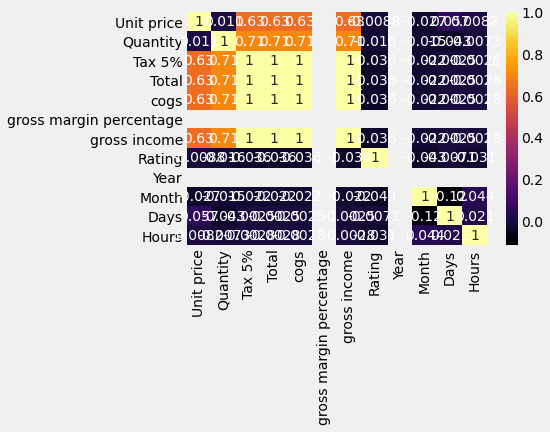

In [108]:
sns.heatmap(data.corr(method='pearson'),annot=True,cmap='inferno')

### Spearman

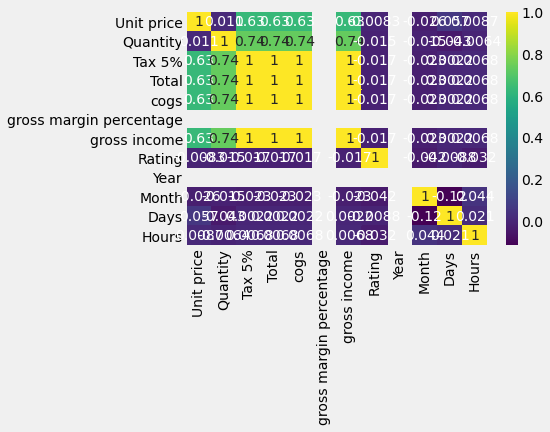

In [109]:
sns.heatmap(data.corr(method='spearman'),annot=True,cmap='viridis')

### --> Appropriate use of countplot to determine the highest & lowest sold product line.

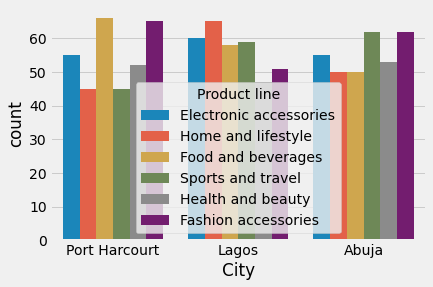

In [110]:
sns.countplot(data=data,x='City',hue='Product line')

* Food And Beverages are sold most in Port-Harcourt

* Fashion accessories are also sold most in Port-Harcourt

* Lagos has the highes purchase for electronic equipments

* Sports and travel products were mostly sold at Abuja

* Home and lifestyle commoditites are heavily purchased in Lagos

* All three states have an approximate equal number of sales for health and beauty commodities

* The supermarket should focus on increasing it marketing strategy for sales of health and beauty products especially in lagos which has high potential yield rate

* In other for the Branch at portharcourt to do better the sales management should work on generating more incoming through sports and travel, home, and lifestyle commodities. 

* More efforts need to be put in the Lagos fashion accessory fraction

* Relative to Lagos and Port Harcourt Abuja branch hasn't been doing well sales wise as regars the yield in sales for the food, beverage, home, lifestyle, health and beauty hence more attention should be given to these areas

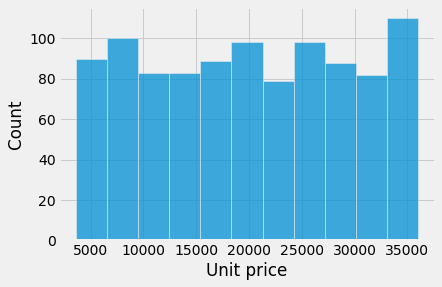

In [111]:
sns.histplot(data['Unit price'])

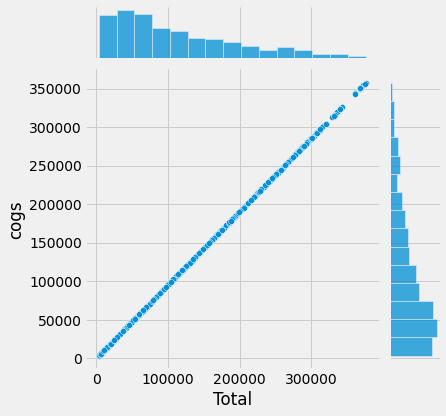

In [112]:
sns.jointplot(data['Total'],data['cogs'],data,kind='scatter')

This indicates that there is high variance in the correlation between the cost of goods sold and the total amount generated

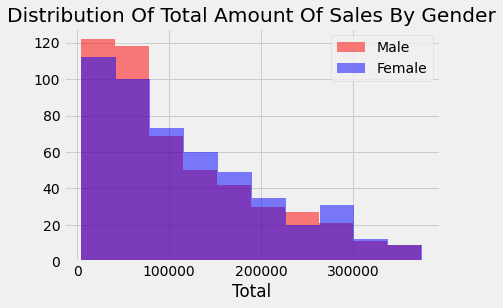

In [113]:
plt.hist('Total',data=data[data['Gender']=='Male'],alpha=0.5,label='Male',color='red')
plt.hist('Total',data=data[data['Gender']=='Female'],alpha=0.5,label='Female',color='blue')
plt.title('Distribution Of Total Amount Of Sales By Gender')
plt.xlabel('Total')
plt.legend(loc=0)

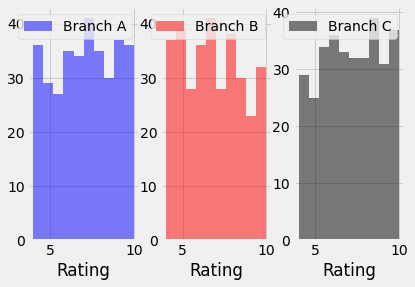

In [114]:
plt.subplot(1,3,1)
plt.hist('Rating',data=data[data['Branch']=='A'],alpha=0.5,label='Branch A',color='blue')
plt.xlabel('Rating')
plt.legend(loc=0)

plt.subplot(1,3,2)
plt.hist('Rating',data=data[data['Branch']=='B'],alpha=0.5,label='Branch B',color='red')
plt.xlabel('Rating')
plt.legend(loc=0)

plt.subplot(1,3,3)
plt.hist('Rating',data=data[data['Branch']=='C'],alpha=0.5,label='Branch C',color='black')
plt.xlabel('Rating')
plt.legend(loc=0)

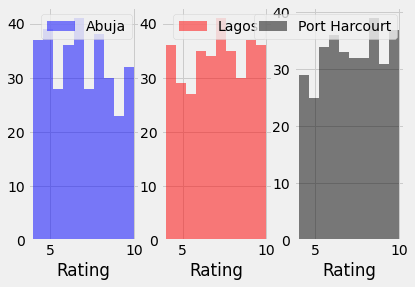

In [118]:
plt.subplot(1,3,1)
plt.hist('Rating',data=data[data['City']=='Abuja'],alpha=0.5,label='Abuja',color='blue')
plt.xlabel('Rating')
plt.legend(loc=0)

plt.subplot(1,3,2)
plt.hist('Rating',data=data[data['City']=='Lagos'],alpha=0.5,label='Lagos',color='red')
plt.xlabel('Rating')
plt.legend(loc=0)

plt.subplot(1,3,3)
plt.hist('Rating',data=data[data['City']=='Port Harcourt'],alpha=0.5,label='Port Harcourt',color='black')
plt.xlabel('Rating')
plt.legend(loc=0)

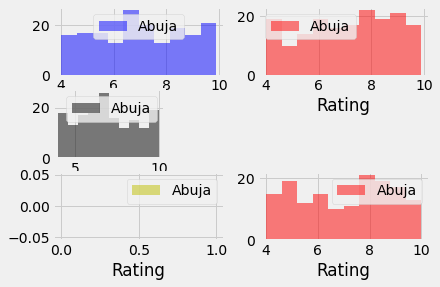

In [116]:
plt.subplot(3,2,1)
plt.hist('Rating',data=data[data['Product line']=='Fashion accessories'],alpha=0.5,label='Abuja',color='blue')
plt.xlabel('Rating')
plt.legend(loc=0)

plt.subplot(3,2,2)
plt.hist('Rating',data=data[data['Product line']=='Food and beverages'],alpha=0.5,label='Abuja',color='r')
plt.xlabel('Rating')
plt.legend(loc=0)

plt.subplot(3,2,3)
plt.hist('Rating',data=data[data['Product line']=='Electrical accessories'],alpha=0.5,label='Abuja',color='g')
plt.xlabel('Rating')
plt.legend(loc=0)

plt.subplot(3,3,4)
plt.hist('Rating',data=data[data['Product line']=='Sports and travel'],alpha=0.5,label='Abuja',color='k')
plt.xlabel('Rating')
plt.legend(loc=0)

plt.subplot(3,2,5)
plt.hist('Rating',data=data[data['Product line']=='Home and lifesttyle'],alpha=0.5,label='Abuja',color='y')
plt.xlabel('Rating')
plt.legend(loc=0)

plt.subplot(3,2,6)
plt.hist('Rating',data=data[data['Product line']=='Health and beauty'],alpha=0.5,label='Abuja',color='r')
plt.xlabel('Rating')
plt.legend(loc=0)
